In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blocc import blocc

from utils import *

In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

In [3]:
epochs = 80
seeds = 10

In [4]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blocc': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    }
}

# Dataset Diabetes

In [5]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150

In [6]:
metrics_diabetes = {}
variables_diabetes = {}

algs = ['blocc', 'lv_hba', 'gam']

for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: blocc lv_hba gam DONE
Starting seed 2/10: blocc lv_hba gam DONE
Starting seed 3/10: blocc lv_hba gam DONE
Starting seed 4/10: blocc lv_hba gam DONE
Starting seed 5/10: blocc lv_hba gam DONE
Starting seed 6/10: blocc lv_hba gam DONE
Starting seed 7/10: blocc lv_hba gam DONE
Starting seed 8/10: blocc lv_hba gam DONE
Starting seed 9/10: blocc lv_hba gam DONE
Starting seed 10/10: blocc lv_hba gam DONE


## Evaluation

In [7]:
results_path = f'Plots_{dataset_name}/'

In [8]:
metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_blocc = metrics_diabetes['blocc']

axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
axis_blocc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blocc]).mean(0)

axis_iter = np.arange(epochs)

In [9]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
train_acc_blocc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blocc])

val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
val_acc_blocc = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_blocc])

test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
test_acc_blocc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blocc])

In [10]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:,0:]
val_loss_blocc = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_blocc])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:,0:]
test_loss_blocc = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_blocc])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:,1:]
lower_loss_blocc = np.array([[x['loss_lower'] for x in metric] for metric in metrics_blocc])[:,1:]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


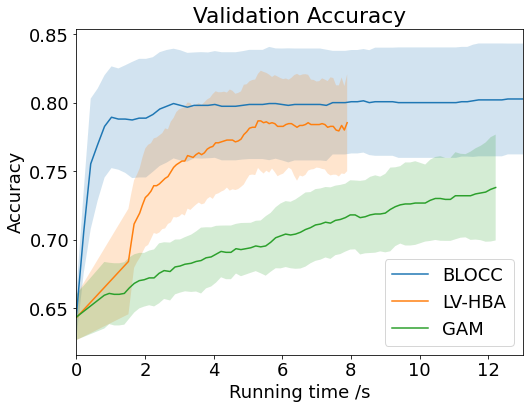

In [11]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,val_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

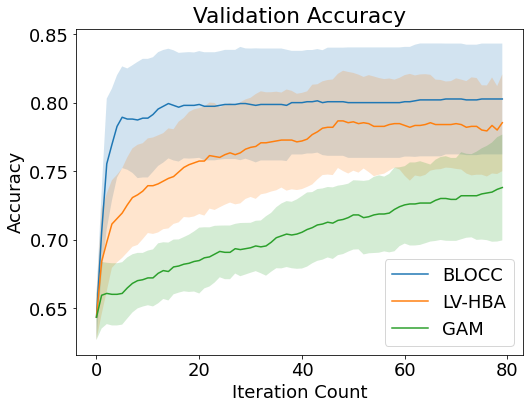

In [12]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

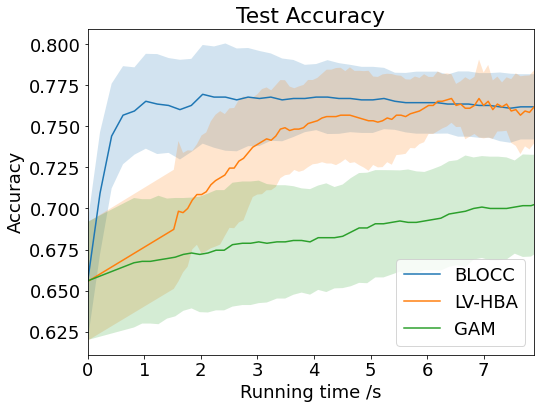

In [13]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

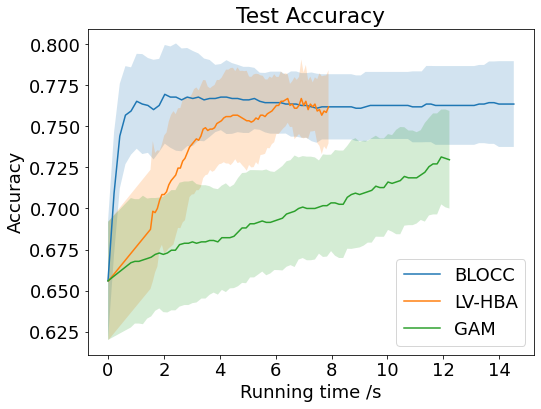

In [14]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

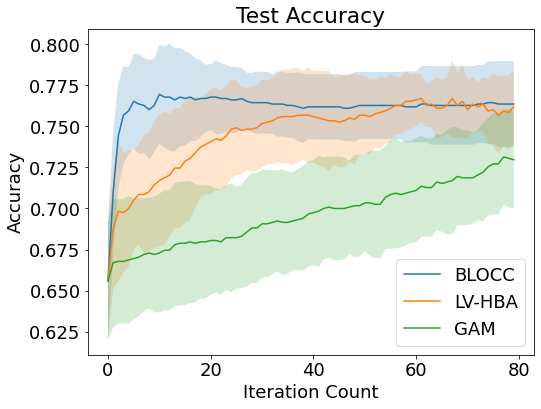

In [15]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

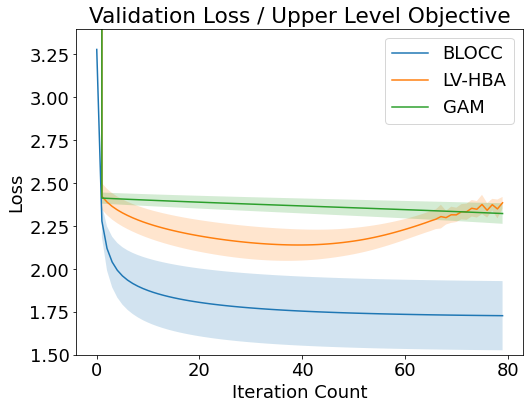

In [16]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

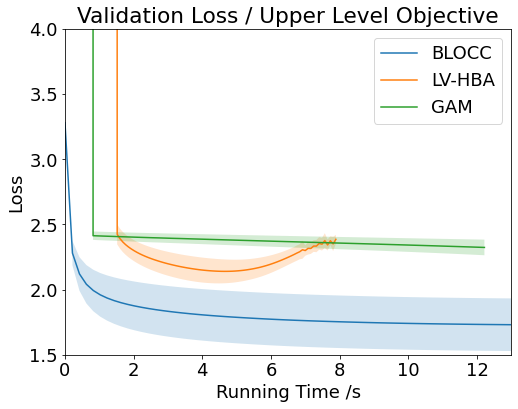

In [17]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,val_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(axis_blocc[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

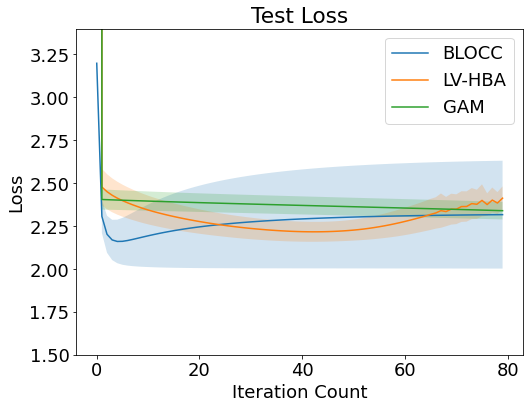

In [18]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = test_loss_blocc.mean(0)-test_loss_blocc.std(0)
fill_up_blocc = test_loss_blocc.mean(0)+test_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

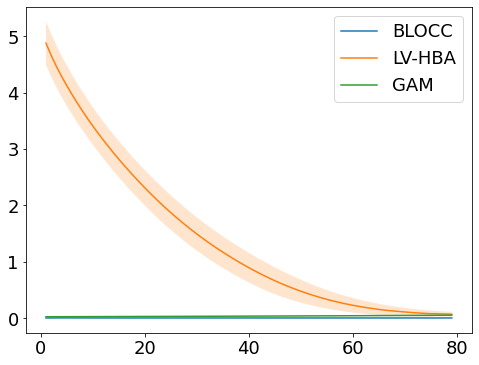

In [19]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = lower_loss_blocc.mean(0)-lower_loss_blocc.std(0)
fill_up_blocc = lower_loss_blocc.mean(0)+lower_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc,fill_up_blocc,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
# plt.title('Lower Loss')
# plt.xlabel('Iteration Count')
# plt.ylabel("Loss")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [20]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_blocc.mean(0),'-',label="BLOCC")
# # fill_dn_blocc = constraint_violation_blocc.mean(0)-constraint_violation_blocc.std(0)
# # fill_up_blocc = constraint_violation_blocc.mean(0)+constraint_violation_blocc.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_blocc,fill_up_blocc,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path+'constraint_violation.pdf', bbox_inches="tight")

# Dataset Fourclass

In [21]:
dataset_name = "fourclass"
data = load_fourclass()

n_train = 500
n_val = 150

In [22]:
metrics_fourclass = {}
variables_fourclass = {}

algs = ['blocc', 'lv_hba', 'gam']

for a in algs:
    metrics_fourclass[a] = []
    variables_fourclass[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_fourclass[alg].append(metrics_seed)
        variables_fourclass[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: blocc lv_hba gam DONE
Starting seed 2/10: blocc lv_hba gam DONE
Starting seed 3/10: blocc lv_hba gam DONE
Starting seed 4/10: blocc lv_hba gam DONE
Starting seed 5/10: blocc lv_hba gam DONE
Starting seed 6/10: blocc lv_hba gam DONE
Starting seed 7/10: blocc lv_hba gam DONE
Starting seed 8/10: blocc lv_hba gam DONE
Starting seed 9/10: blocc lv_hba gam DONE
Starting seed 10/10: blocc lv_hba gam DONE


## Evaluation

In [23]:
results_path = f'Plots_{dataset_name}/'

In [24]:
metrics_lvhba = metrics_fourclass['lv_hba']
metrics_gam = metrics_fourclass['gam']
metrics_blocc = metrics_fourclass['blocc']

axis_lvhba = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_gam]).mean(0)
axis_blocc = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_blocc]).mean(0)

axis_iter = np.arange(epochs)

In [25]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_gam])
train_acc_blocc = np.array([[x['train_acc_F'] for x in metrics] for metrics in metrics_blocc])

val_acc_lvhba = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_gam])
val_acc_blocc = np.array([[x['val_acc_F'] for x in metrics] for metrics in metrics_blocc])

test_acc_lvhba = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_gam])
test_acc_blocc = np.array([[x['test_acc_F'] for x in metrics] for metrics in metrics_blocc])

In [26]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
val_loss_blocc = np.array([[x['val_loss_F'] for x in metrics] for metrics in metrics_blocc])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
test_loss_blocc = np.array([[x['test_loss_F'] for x in metrics] for metrics in metrics_blocc])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_gam])[:,1:]
lower_loss_blocc = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_blocc])[:,1:]


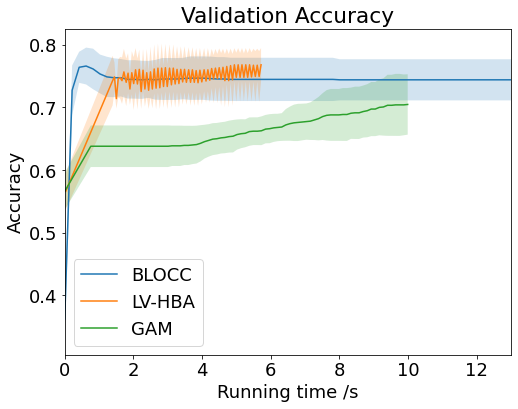

In [27]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,val_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

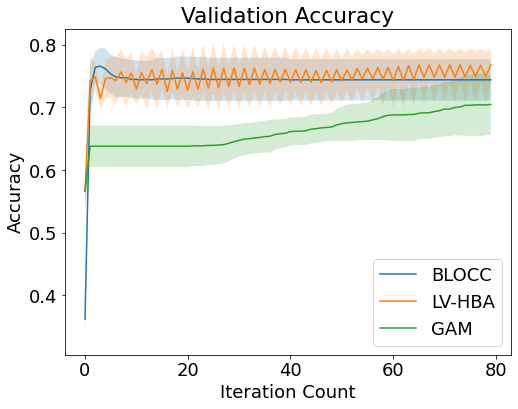

In [28]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

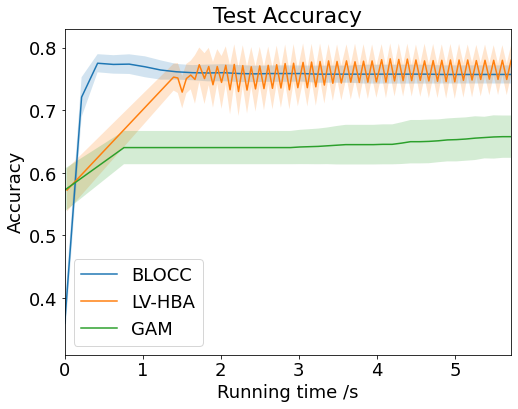

In [29]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

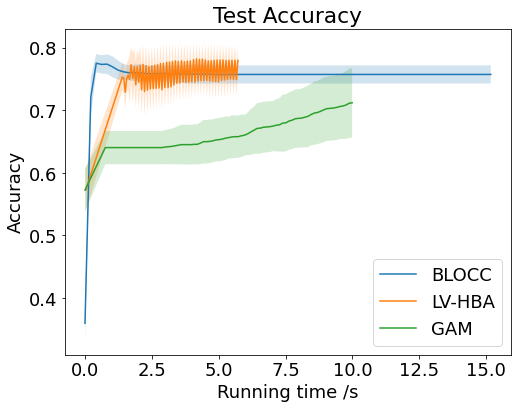

In [30]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

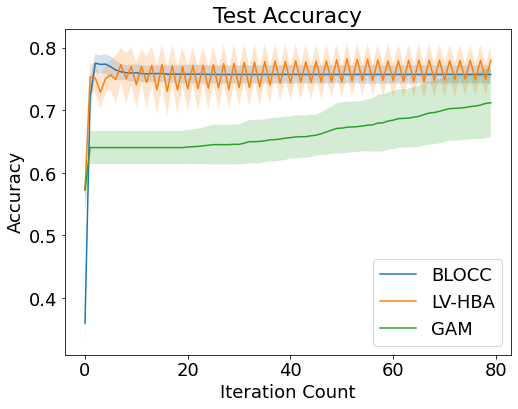

In [31]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

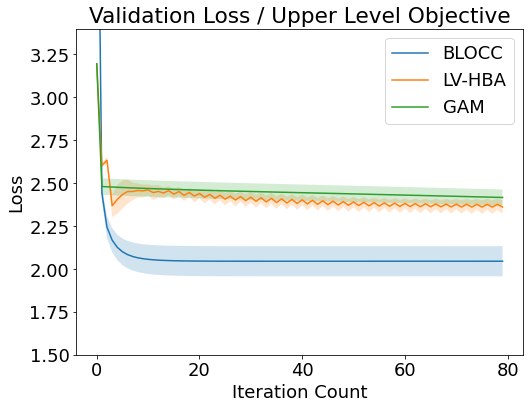

In [32]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

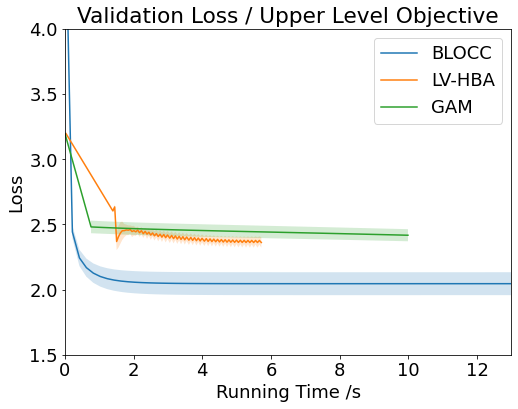

In [33]:
plt.figure(figsize=(8,6))

plt.plot(axis_blocc,val_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(axis_blocc[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

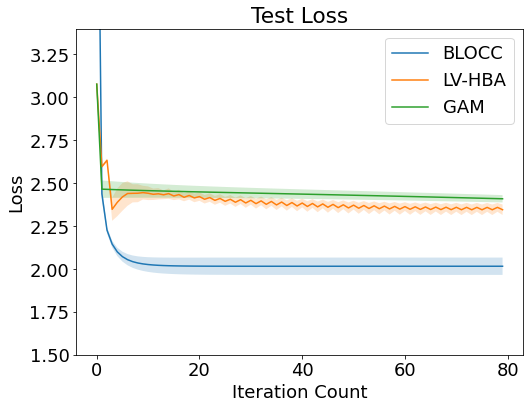

In [34]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = test_loss_blocc.mean(0)-test_loss_blocc.std(0)
fill_up_blocc = test_loss_blocc.mean(0)+test_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

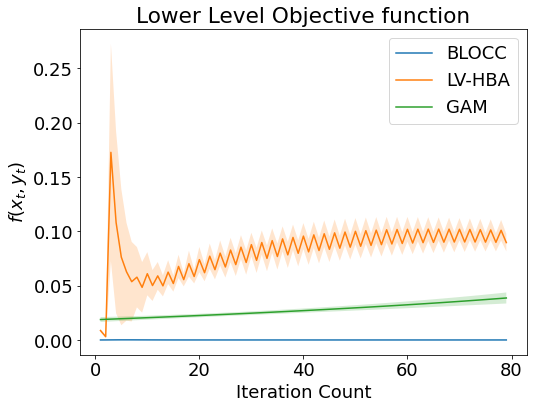

In [35]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = lower_loss_blocc.mean(0)-lower_loss_blocc.std(0)
fill_up_blocc = lower_loss_blocc.mean(0)+lower_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc,fill_up_blocc,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
plt.title('Lower Level Objective function')
plt.xlabel('Iteration Count')
plt.ylabel("$f(x_t, y_t)$")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

# Gamma Sensitivity Analysis

In [36]:
data = load_diabetes()
n_train = 500
n_val = 150

seeds = 5

In [37]:
import cvxpy as cp

def opt_ll(C, x_train, y_train):

    w_opt = cp.Variable(x_train.shape[1])
    b_opt = cp.Variable()
    xi_opt = cp.Variable(y_train.shape[0], nonneg=True)

    loss_lower =  0.5*cp.norm(w_opt, 2)**2

    constraints=[]
    for i in range(y_train.shape[0]):
        constraints.append(1 - xi_opt[i] - y_train[i] * (cp.scalar_product(w_opt, x_train[i])+b_opt) <= 0)

    constraints_xi = [xi_opt <= C]

    obj_lower = cp.Minimize(loss_lower)

    prob_lower = cp.Problem(obj_lower, constraints + constraints_xi)
    prob_lower.solve()

    return w_opt.value, b_opt.value, xi_opt.value

In [38]:
gamma_vals = np.logspace(-2, 2, 5)

opt_gaps = np.zeros((gamma_vals.shape[0], seeds))
upper_levels = np.zeros((gamma_vals.shape[0], seeds))
for i, gamma in enumerate(gamma_vals):

    print(f"{i+1}/{gamma_vals.shape[0]} - Starting gamma: {gamma}", flush=True)

    hparams['blocc']['gam'] = gamma

    for seed in range(seeds):
        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)
        metrics_seed, variables_seed = blocc(x_train, y_train, x_val, y_val, x_test, y_test, hparams['blocc'], epochs, verbose=False)

        w_opt, b_opt, xi_opt = opt_ll(variables_seed[-1]['C'], x_train, y_train)
        opt_gaps[i, seed] += np.linalg.norm(variables_seed[-1]['w'].detach().numpy() - w_opt) + \
                       np.linalg.norm(variables_seed[-1]['b'].detach().numpy() - b_opt) + \
                       np.linalg.norm(variables_seed[-1]['xi'].detach().numpy() - xi_opt)
        
        upper_levels[i, seed] += metrics_seed[-1]['loss_upper']
        
    opt_gaps[i] /= seeds
    upper_levels[i] /= seeds

1/5 - Starting gamma: 0.01
2/5 - Starting gamma: 0.1
3/5 - Starting gamma: 1.0
4/5 - Starting gamma: 10.0
5/5 - Starting gamma: 100.0


Text(0.5, 0, '$\\gamma$')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


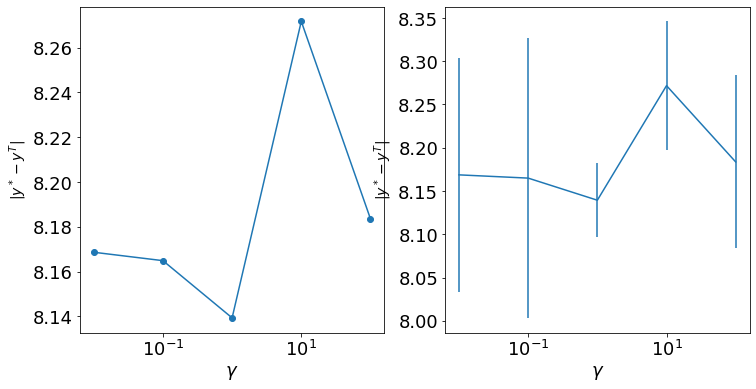

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].semilogx(gamma_vals, opt_gaps.mean(1), 'o-')
ax[0].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, opt_gaps.mean(1), yerr=opt_gaps.std(1))
ax[1].set_xscale('log')
ax[1].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

Text(0.5, 0, '$\\gamma$')

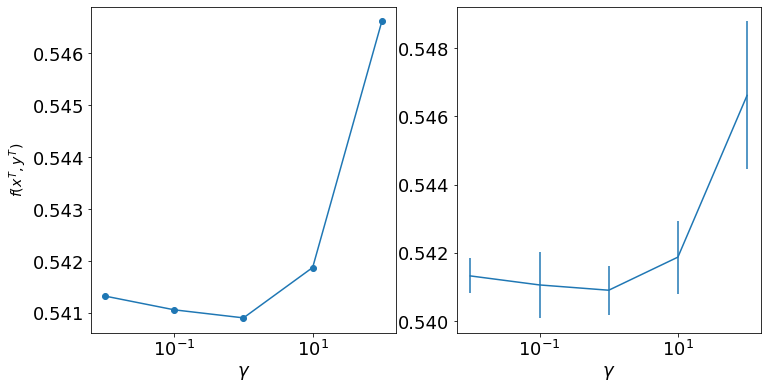

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].semilogx(gamma_vals, upper_levels.mean(1), 'o-')
ax[0].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, upper_levels.mean(1), yerr=upper_levels.std(1))
ax[1].set_xscale('log')
#ax[1].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

# Measuring Convergence Time

In [41]:
n_train = 500
n_val = 150
seeds = 10
early_stopping_th = {'blocc': 2e-2, 'lv_hba': 1e-4, 'gam': 1e-7}

algs = ['blocc', 'lv_hba', 'gam']

In [42]:
metrics = {}
variables = {}

for dataset_name in ["diabetes", "fourclass"]:
    print(f"Starting {dataset_name}")
    data = eval("load_" + dataset_name)()

    metrics[dataset_name] = {}
    variables[dataset_name] = {}

    for a in algs:
        metrics[dataset_name][a] = []
        variables[dataset_name][a] = []

    for seed in range(seeds):

        print(f"Starting seed {seed+1}/{seeds}: ", end="")

        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

        for alg in algs:
            print(f"{alg}", end=" ")

            metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, early_stopping_th=early_stopping_th[alg], verbose=False)
            metrics[dataset_name][alg].append(metrics_seed)
            variables[dataset_name][alg].append(variables_seed)
        print("DONE")

Starting diabetes
Starting seed 1/10: blocc lv_hba gam DONE
Starting seed 2/10: blocc lv_hba gam DONE
Starting seed 3/10: blocc lv_hba gam DONE
Starting seed 4/10: blocc lv_hba gam DONE
Starting seed 5/10: blocc lv_hba gam DONE
Starting seed 6/10: blocc lv_hba gam DONE
Starting seed 7/10: blocc lv_hba gam DONE
Starting seed 8/10: blocc lv_hba gam DONE
Starting seed 9/10: blocc lv_hba gam DONE
Starting seed 10/10: blocc lv_hba gam DONE
Starting fourclass
Starting seed 1/10: blocc lv_hba gam DONE
Starting seed 2/10: blocc lv_hba gam DONE
Starting seed 3/10: blocc lv_hba gam DONE
Starting seed 4/10: blocc lv_hba gam DONE
Starting seed 5/10: blocc lv_hba gam DONE
Starting seed 6/10: blocc lv_hba gam DONE
Starting seed 7/10: blocc lv_hba gam DONE
Starting seed 8/10: blocc lv_hba gam DONE
Starting seed 9/10: blocc lv_hba gam DONE
Starting seed 10/10: blocc lv_hba gam DONE


In [43]:
np.mean([metrics['diabetes']['blocc'][i][-1]['time_computation'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['time_computation'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['time_computation'] for i in range(10)])

(16.05951247215271, 8.188861536979676, 12.180707430839538)

In [44]:
np.mean([metrics['diabetes']['blocc'][i][-1]['test_acc_F'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['test_acc'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['test_acc'] for i in range(10)])

(0.7567797, 0.759322033898305, 0.72118646)